<a href="https://colab.research.google.com/github/Sergey-Kiselev-dev/ML_sem_pub/blob/main/ML_04_selfedu_ml_20c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [86]:
np.random.seed(1)

# исходные параметры распределений двух классов
r1 = 0.8
D1 = 13.5
mean1 = [0, -3]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = 0.7
D2 = 17.5
mean2 = [0, 3]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

(2, 40)
(2, 40)
1


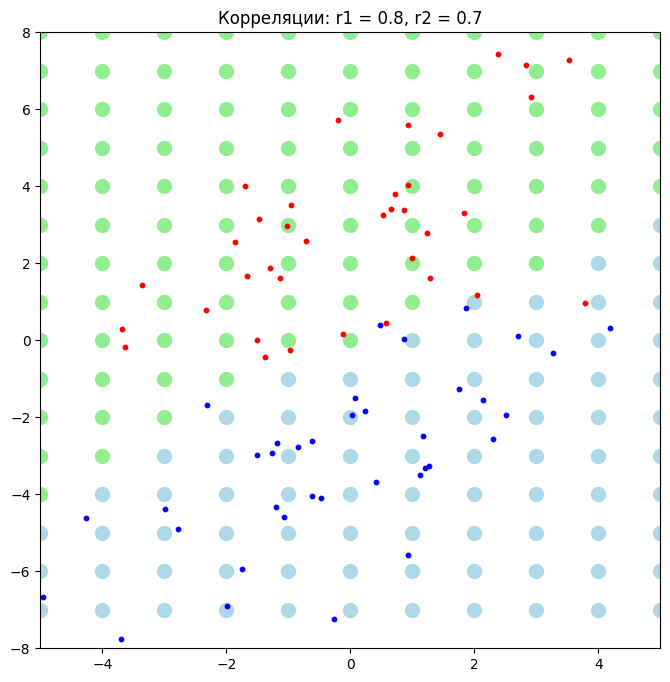

In [82]:
# моделирование обучающей выборки
N = 40
x1 = np.random.multivariate_normal(mean1, V1, N).T
x2 = np.random.multivariate_normal(mean2, V2, N).T
print(x1.shape)
print(x2.shape)
# print(x1)
# print(x2)

# вычисление оценок МО и ковариационных матриц
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

a = (x1.T - mm1).T
VV1 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

a = (x2.T - mm2).T
VV2 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

# модель гауссовского байесовского классификатора
Py1, L1 = 0.5, 1  # вероятности появления классов
Py2, L2 = 1 - Py1, 1  # и величины штрафов неверной классификации

b = lambda x, v, m, l, py: np.log(l * py) - 0.5 * (x - m) @ np.linalg.inv(v) @ (x - m).T - 0.5 * np.log(
    np.linalg.det(v))

# x = np.array([0, -4])  # входной вектор в формате (x, y)
x = np.array([+4, +6])  # входной вектор в формате (x, y)
a = np.argmax([b(x, VV1, mm1, L1, Py1), b(x, VV2, mm2, L2, Py2)])  # классификатор
print(a)

# вывод графиков
plt.figure(figsize=(8, 8))
plt.title(f"Корреляции: r1 = {r1}, r2 = {r2}")
for iy in range(-7, +9, 1):
  for ix in range(-5, +6, 1):
    x = np.array([ix, iy])
    # print(x)
    b = lambda x, v, m, l, py: np.log(l * py) - 0.5 * (x - m) @ np.linalg.inv(v) @ (x - m).T - 0.5 * np.log(np.linalg.det(v))
    a = np.argmax([b(x, VV1, mm1, L1, Py1), b(x, VV2, mm2, L2, Py2)])  # классификатор
    clr = 'lightblue'
    if a == 1: clr = 'lightgreen'
    plt.scatter(ix, iy, color=clr, marker='o', s = 100)
plt.scatter(x1[0], x1[1], s = 10, color='blue')
plt.scatter(x2[0], x2[1], s = 10, color='red')
plt.xlim([-5, +5])
plt.ylim([-8, +8])
plt.show()

(80, 2)
(80,)


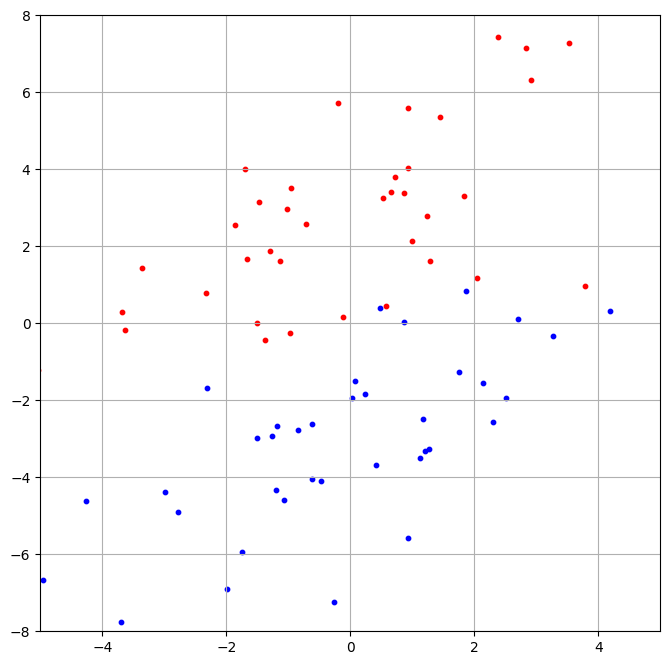

In [87]:
y_train = np.array([])
x_train1 = [[x1[0,i], x1[1,i]] for i in range(x1.shape[1])]
x_train2 = [[x2[0,i], x2[1,i]] for i in range(x2.shape[1])]
y_train = np.append(np.append(y_train, [+1 for i in range(x1.shape[1])]), [-1 for i in range(x1.shape[1])])
y_train[(y_train == 0)] = -1
x_train = x_train1 + x_train2
x_train = np.array(x_train)
# y_train = np.zeros(len(x1))
# for i in range(len(x1)):
  # x_tarin.append([x1[i], x2[i]])
# y_train[i] = []
print(x_train.shape)
print(y_train.shape)
# print(x_train)
# print(y_train)
plt.figure(figsize=(8, 8))
plt.scatter(x1[0], x1[1], s = 10, color='blue')
plt.scatter(x2[0], x2[1], s = 10, color='red')
plt.xlim([-5, +5])
plt.ylim([-8, +8])
plt.grid()
plt.show()

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. -2.  0.  0.  0.  0.]
[ 0.6799242  -1.44194721]
[[-0.96594104 -0.24287002]
 [-1.37846308 -0.43052926]
 [ 0.57038631  0.43735261]
 [ 2.03876108  1.18115745]
 [-0.11325925  0.15466313]
 [ 3.78779245  0.97469697]
 [ 1.86813269  0.85085232]
 [ 2.69984749  0.10586739]
 [ 0.47546551  0.40688287]
 [-2.31488728 -1.67713868]
 [ 0.87496769  0.04499899]]
4.1887979770271935
[-5.0, -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4.0, -3.9, -3.8, -3.7, -3.5999999999999996, -3.5, -3.4, -3.3, -3.2, -3.0999999999999996, -3.0, -2.9, -2.8, -2.6999999999999997, -2.5999999999999996, -2.5, -2.4, -2.3, -2.1999999999999997, -2.0999999999999996, -2.0, -1.9, -1.7999999999999998, -1.6999999999999997, -1.599

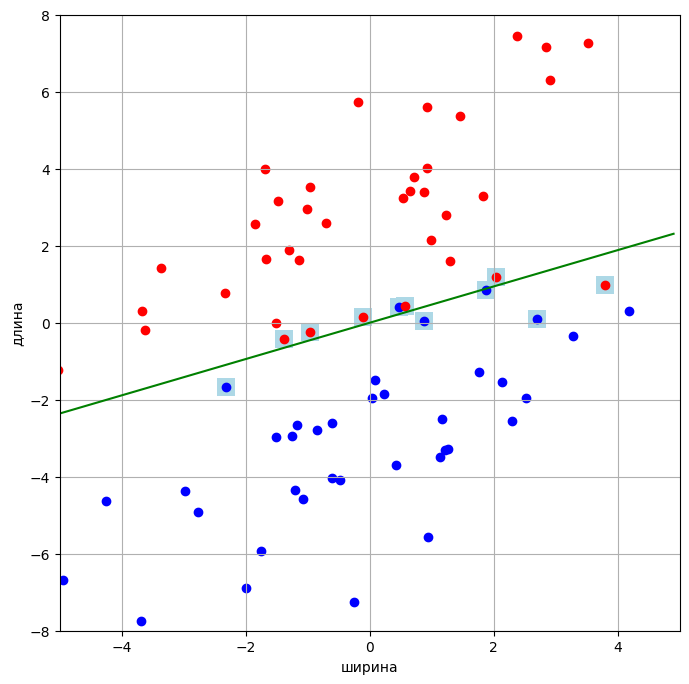

In [85]:
clf = svm.SVC(kernel='linear')  # SVM с линейным ядром
clf.fit(x_train, y_train)  # нахождение вектора w по обучающей выборке
y_pr = clf.predict(x_train)  # проверка на обучающей выборке
print(np.array(y_train) - np.array(y_pr))  # нули - без ошибок; иначе - ошибка

v = clf.support_vectors_  # выделение опорных векторов
w = clf.coef_[0]                # коэффициенты линейной модели
print(w, v, sep='\n')

# формирование графиков для визуализации полученных результатов
# x_train = np.array(x_train)
# y_train = np.array(y_train)

line_x = [-5 + 0.1*i for i in range(100)]    # формирование графика разделяющей линии
# line_y = [-x*w[0]/w[1] - w[2] for x in line_x]
line_y = [-x*w[0]/w[1] for x in line_x]
print(max(x_train[:, 0]))
# print([0.1*i for i in range(10)])
print(line_x, line_y, sep='\n')

x_0 = x_train[y_train == 1]  # формирование точек для 1-го
x_1 = x_train[y_train == -1]  # и 2-го классов

clr = 'lightblue'
plt.figure(figsize=(8, 8))
plt.scatter(v[:, 0], v[:, 1], s=170, color=clr, linewidths=0, marker='s')
plt.scatter(x_0[:, 0], x_0[:, 1], color='blue')
plt.scatter(x_1[:, 0], x_1[:, 1], color='red')
plt.plot(line_x, line_y, color='green')

plt.xlim([-5, +5])
plt.ylim([-8, +8])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()